### Load Functions

In [1]:
from simple_trade import compute_indicator, download_data
import pandas as pd
from simple_trade import IndicatorPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Create a plotter instance
plotter = IndicatorPlotter()

### The Average Directional Index (ADX) 

In [2]:
# Step 1: Download data
symbol = 'TSLA'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 14
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='adx',
    parameters=parameters,
    columns=columns
)

data.head(5)


Computing ADX...


,Adj Close,Close,High,Low,Open,Volume,ADX_14,+DI_14,-DI_14
Date,,,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,NaN,NaN,NaN
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,NaN,NaN,NaN
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,NaN,NaN,NaN
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,NaN,NaN,NaN
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,NaN,NaN,NaN


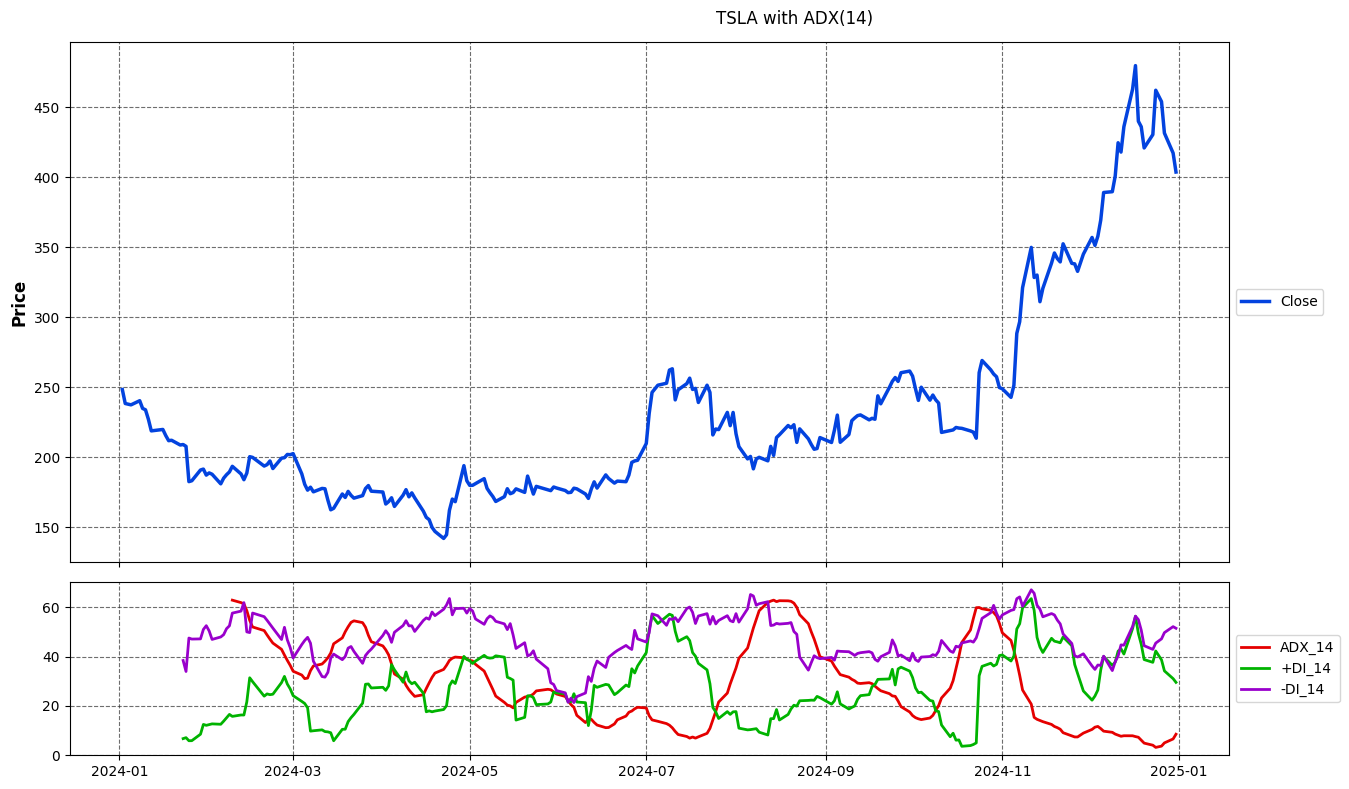

In [3]:
# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'ADX_{window}', f'+DI_{window}', f'-DI_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with ADX({window})"
    )

### The Aroon indicator (Aroon)


Computing AROON...


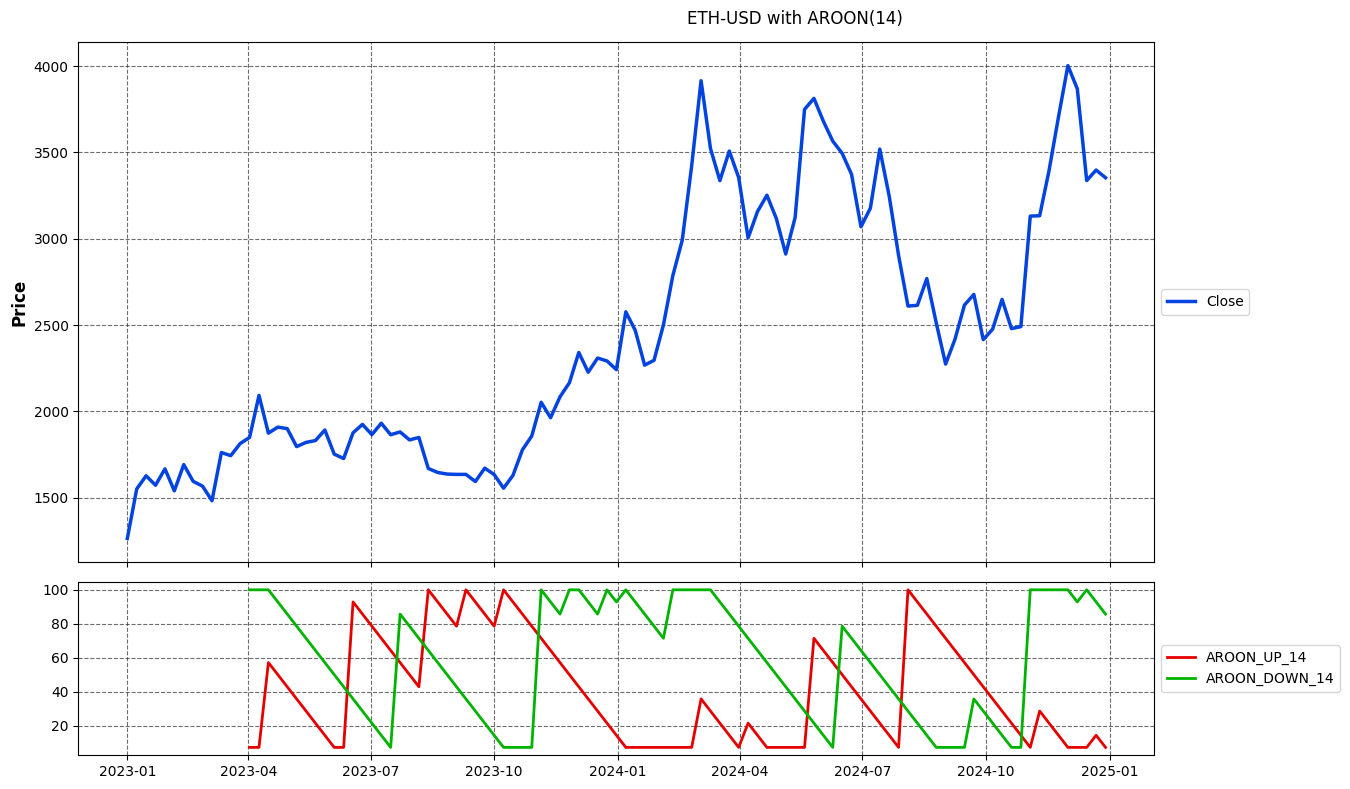

In [4]:
# Step 1: Download data
symbol = 'ETH-USD'
start = '2023-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval) # end_date is optional

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["period"] = 14
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='aroon',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
period = parameters["period"]
columns = [f'AROON_UP_{period}', f'AROON_DOWN_{period}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with AROON({period})"
    )

### The Exponential Moving Average Index (EMA)


Computing EMA...


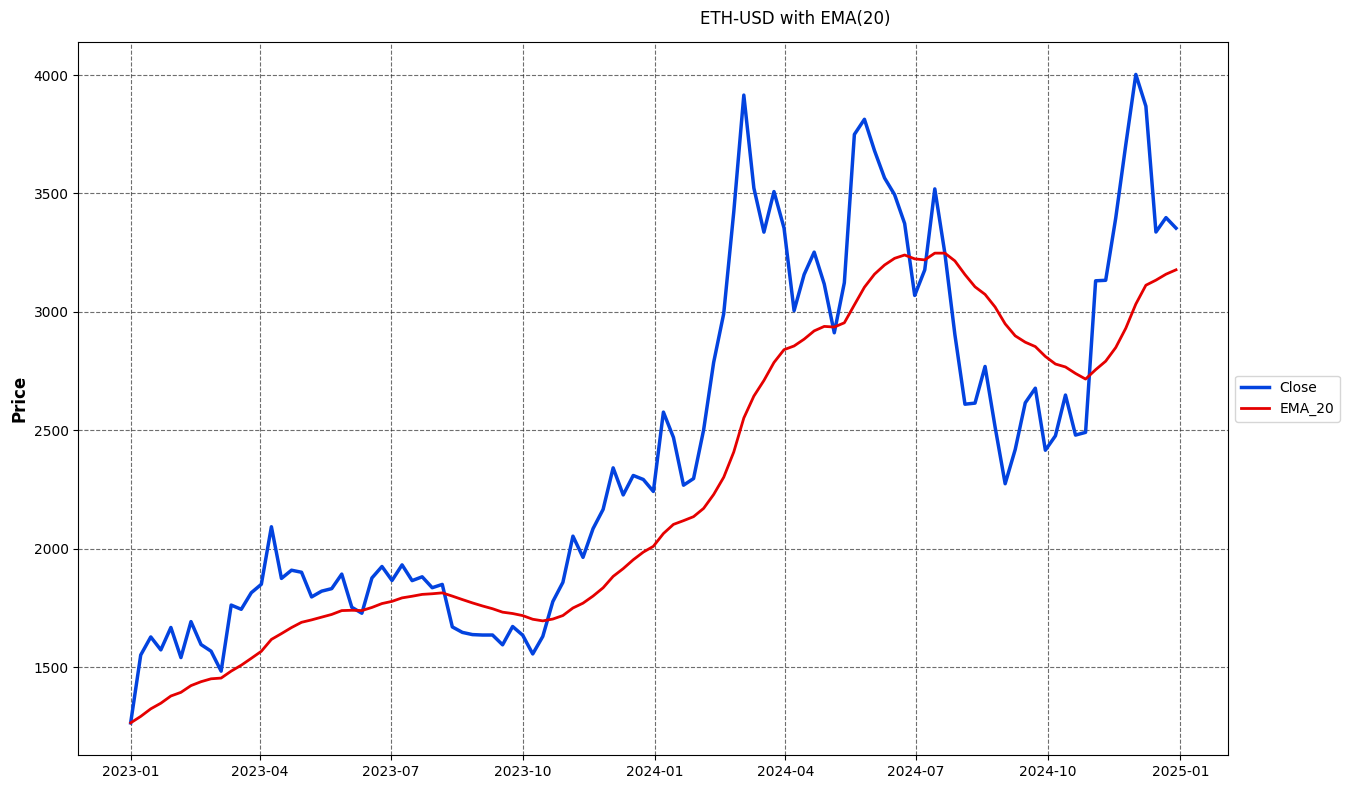

In [5]:
# Step 1: Download data
symbol = 'ETH-USD'
start = '2023-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval) # end_date is optional

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 20
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='ema',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'EMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with EMA({window})"
    )

### The Hull Moving Average Index (HMA)


Computing HMA...


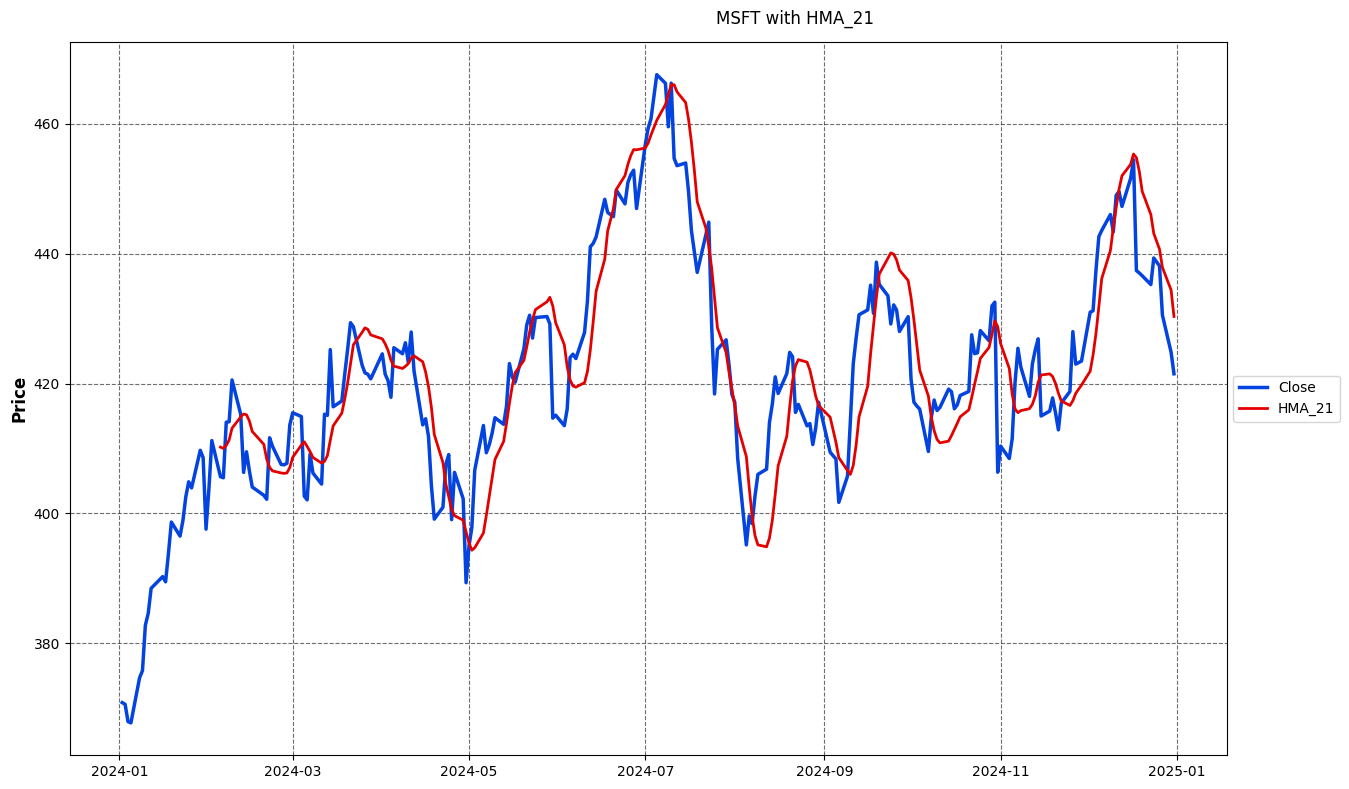

In [6]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 21
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='hma',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'HMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with HMA_{window}"
    )

### Ichimoku Cloud indicators (ICHI)

In [7]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-06-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["tenkan_period"] = 9
parameters["kijun_period"] = 26
parameters["senkou_b_period"] = 52
parameters["displacement"] = 26
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='ichimoku',
    parameters=parameters,
    columns=columns
)

data.tail(5)


Computing ICHIMOKU...


,Adj Close,Close,High,Low,Open,Volume,tenkan_sen_9,kijun_sen_26,senkou_span_a_9_26,senkou_span_b_52,chikou_span_26
Date,,,,,,,,,,,
2025-05-08,438.170013,438.170013,443.670013,435.660004,437.929993,23491300,414.055008,394.230011,384.144989,407.809998,NaN
2025-05-09,438.730011,438.730011,440.739990,435.880005,440.000000,15324200,414.055008,394.230011,384.144989,407.809998,NaN
2025-05-12,449.260010,449.260010,449.369995,439.779999,445.940002,22821900,416.904999,397.080002,384.144989,407.809998,NaN
2025-05-13,449.140015,449.140015,450.670013,445.359985,447.779999,23618800,437.785004,397.730011,379.367500,403.930008,NaN
2025-05-14,452.940002,452.940002,453.899994,448.140015,448.140015,19870100,441.944992,402.074997,371.760002,396.585007,NaN


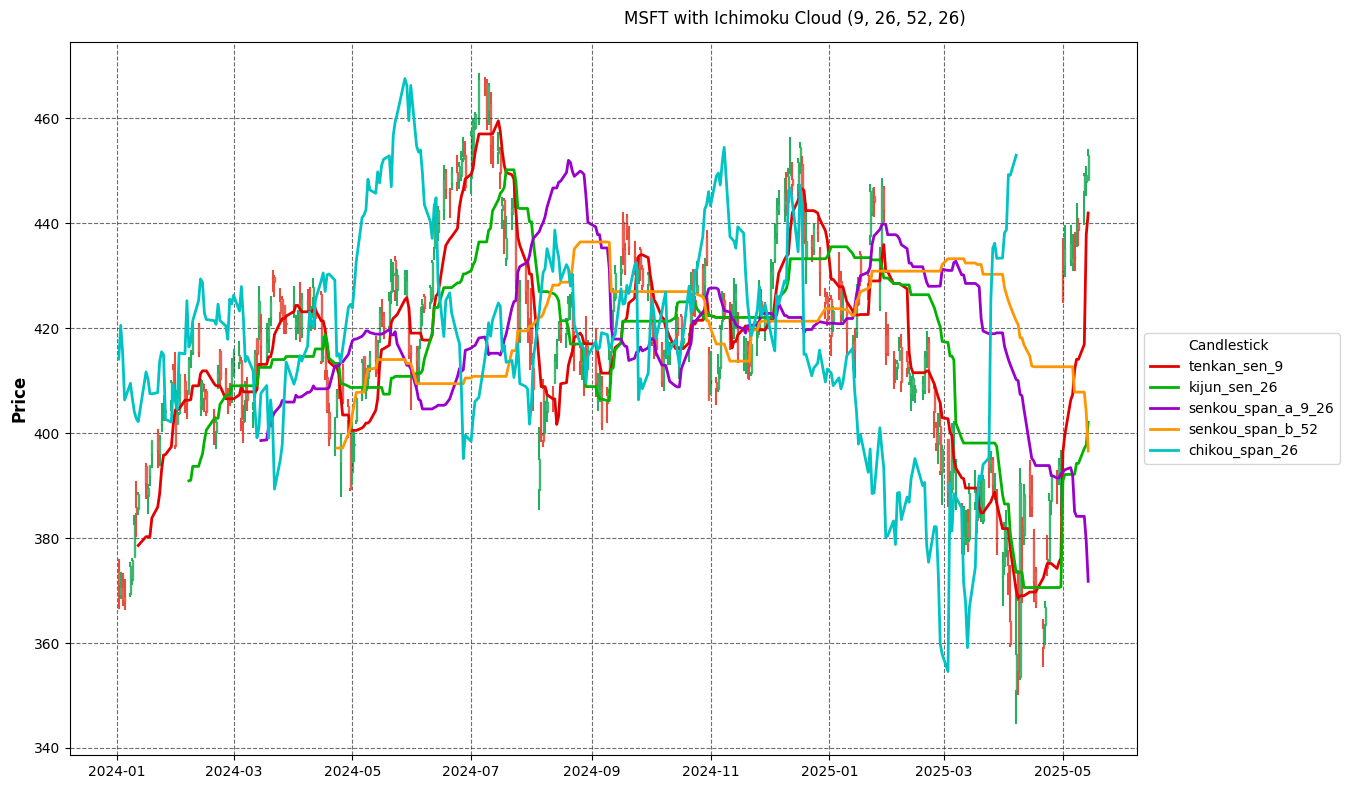

In [8]:
# Step 3: Plot the indicator
tenkan_period = parameters["tenkan_period"]
kijun_period = parameters["kijun_period"]
senkou_b_period = parameters["senkou_b_period"]
displacement = parameters["displacement"]
columns = [f'tenkan_sen_{tenkan_period}', 
           f'kijun_sen_{kijun_period}', 
           f'senkou_span_a_{tenkan_period}_{kijun_period}', 
           f'senkou_span_b_{senkou_b_period}', 
           f'chikou_span_{displacement}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False,
        plot_type='candlestick',
        title=f"{symbol} with Ichimoku Cloud ({tenkan_period}, {kijun_period}, {senkou_b_period}, {displacement})"
    )

### The Parabolic SAR Index (PSAR)

In [9]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["af_initial"] = 0.02
parameters["af_step"] = 0.02
parameters["af_max"] = 0.2
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='psar',
    parameters=parameters,
    columns=columns
)

data.head(5)


Computing PSAR...


,Adj Close,Close,High,Low,Open,Volume,PSAR_0.02_0.02_0.2,PSAR_Bullish_0.02_0.02_0.2,PSAR_Bearish_0.02_0.02_0.2
Date,,,,,,,,,
2024-01-02,367.380615,370.869995,375.899994,366.769989,373.859985,25258600,366.769989,366.769989,185.434998
2024-01-03,367.113159,370.600006,373.260010,368.510010,369.010010,23083500,366.769989,366.769989,185.300003
2024-01-04,364.478210,367.940002,373.100006,367.170013,370.670013,20901500,366.769989,366.769989,183.970001
2024-01-05,364.289978,367.750000,372.059998,366.500000,368.970001,20987000,375.899994,551.625000,375.899994
2024-01-08,371.164673,374.690002,375.200012,369.010010,369.299988,23134000,375.711994,562.035004,375.711994


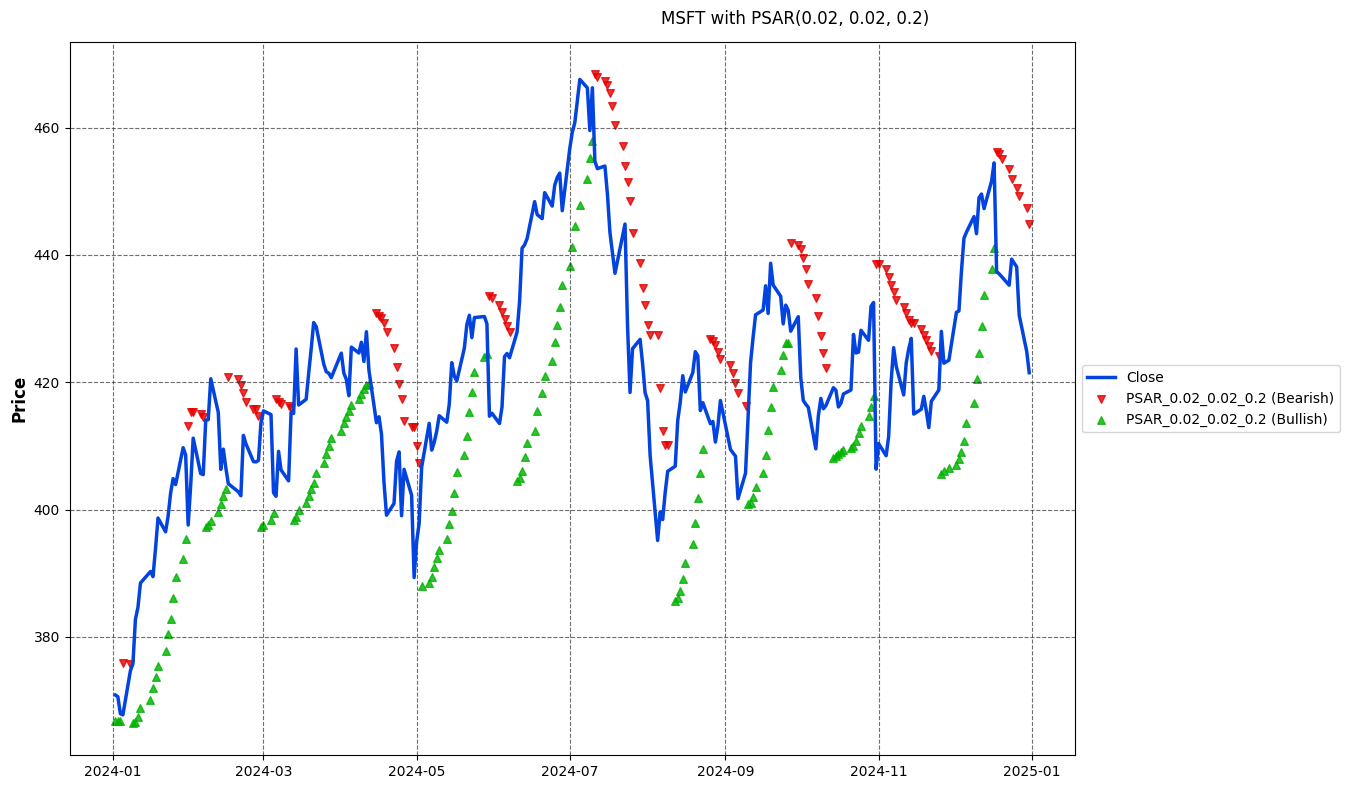

In [10]:
# Step 3: Plot the indicator
af_initial = parameters["af_initial"]
af_step = parameters["af_step"]
af_max = parameters["af_max"]
columns = [f'PSAR_{af_initial}_{af_step}_{af_max}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with PSAR({af_initial}, {af_step}, {af_max})"
    )

### The Simple Moving Average Index (SMA)


Computing SMA...


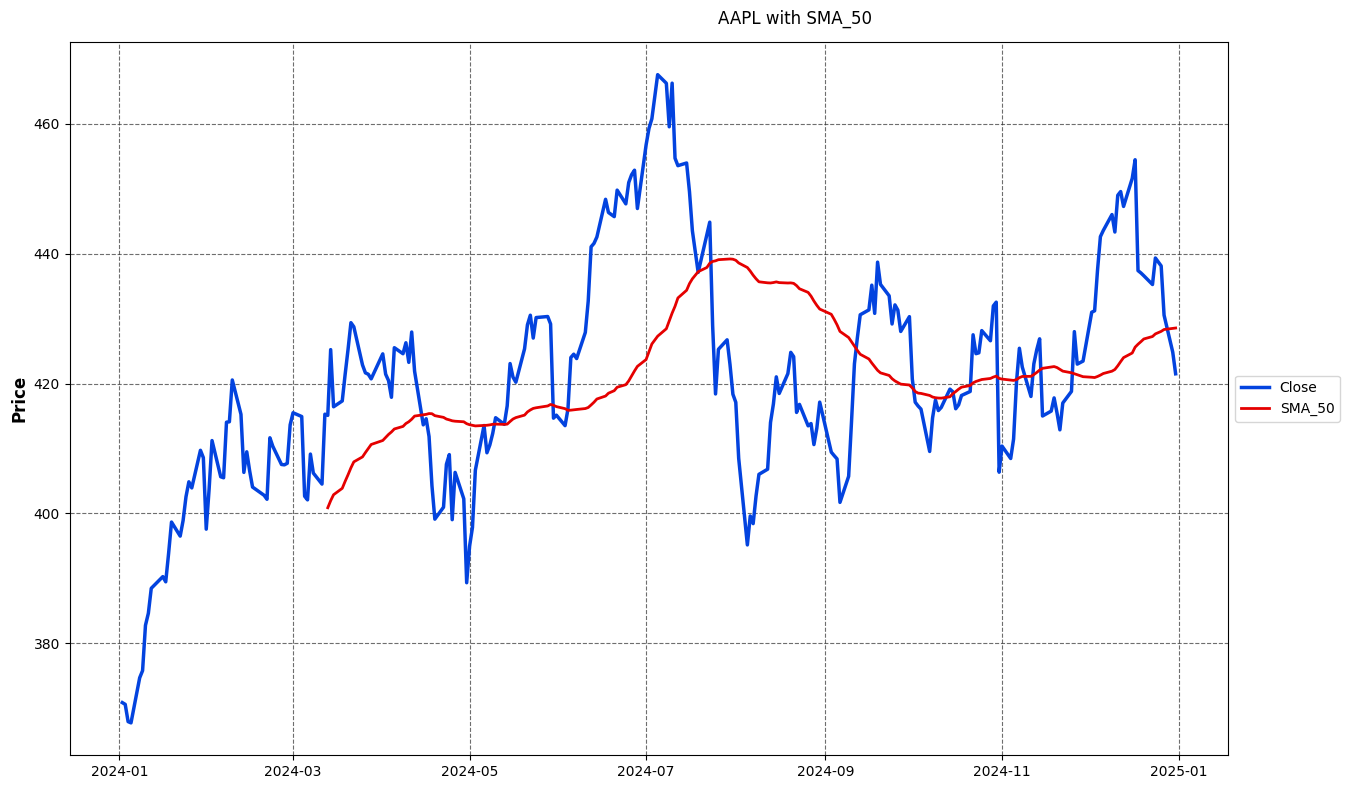

In [11]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2024-04-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
aapl = download_data(symbol, start, end, interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 50
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='sma',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'SMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with SMA_{window}"
    )

### The SuperTrend (STREND)


Computing STREND...


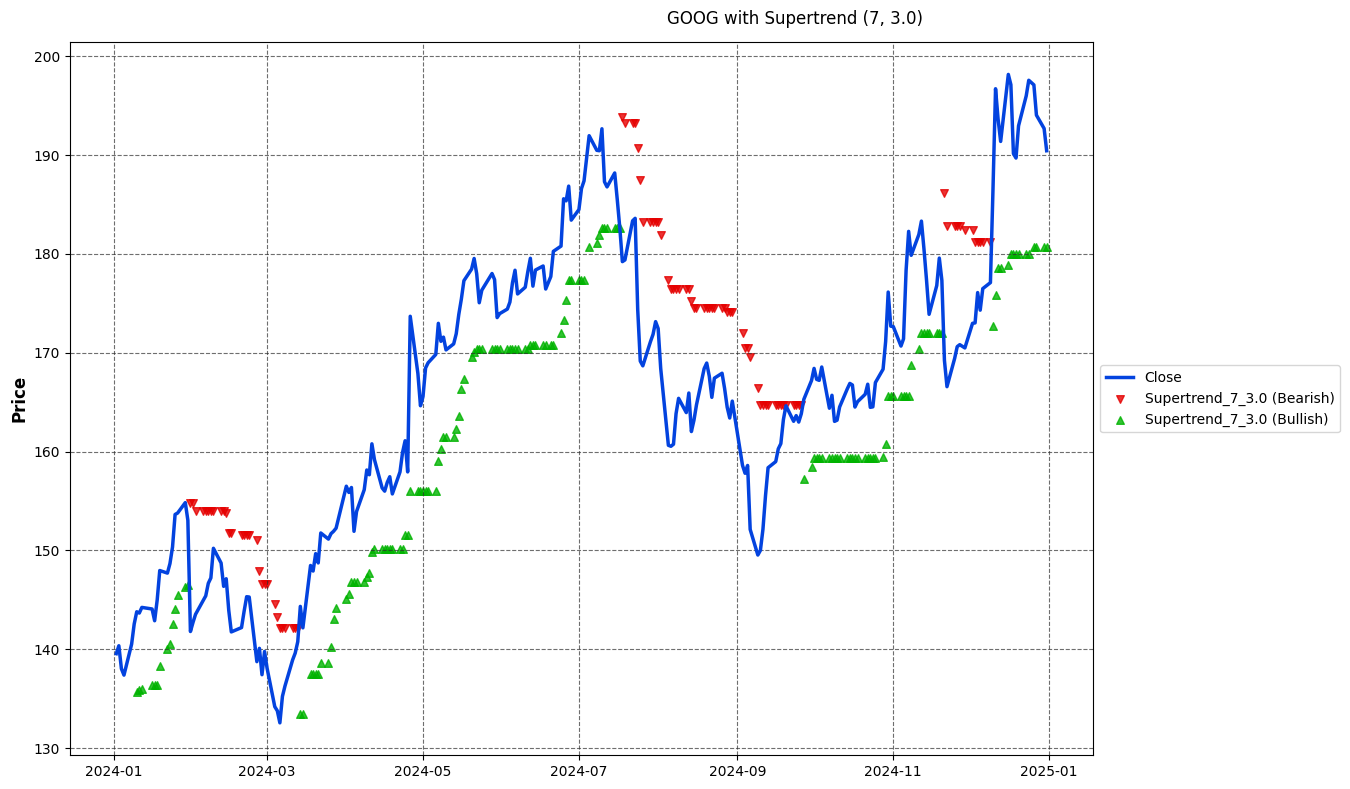

In [ ]:
# Step 1: Download data
symbol = 'GOOG'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["period"] = 7
parameters["multiplier"] = 3.0
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='strend',
    parameters=parameters,
    columns=columns
    )

# Step 3: Plot the indicator
period = parameters["period"]
multiplier = parameters["multiplier"]
columns = [f'Supertrend_{period}_{multiplier}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with Supertrend ({period}, {multiplier})"
    )

### The Triple Exponential Average (TRIX)


Computing TRIX...


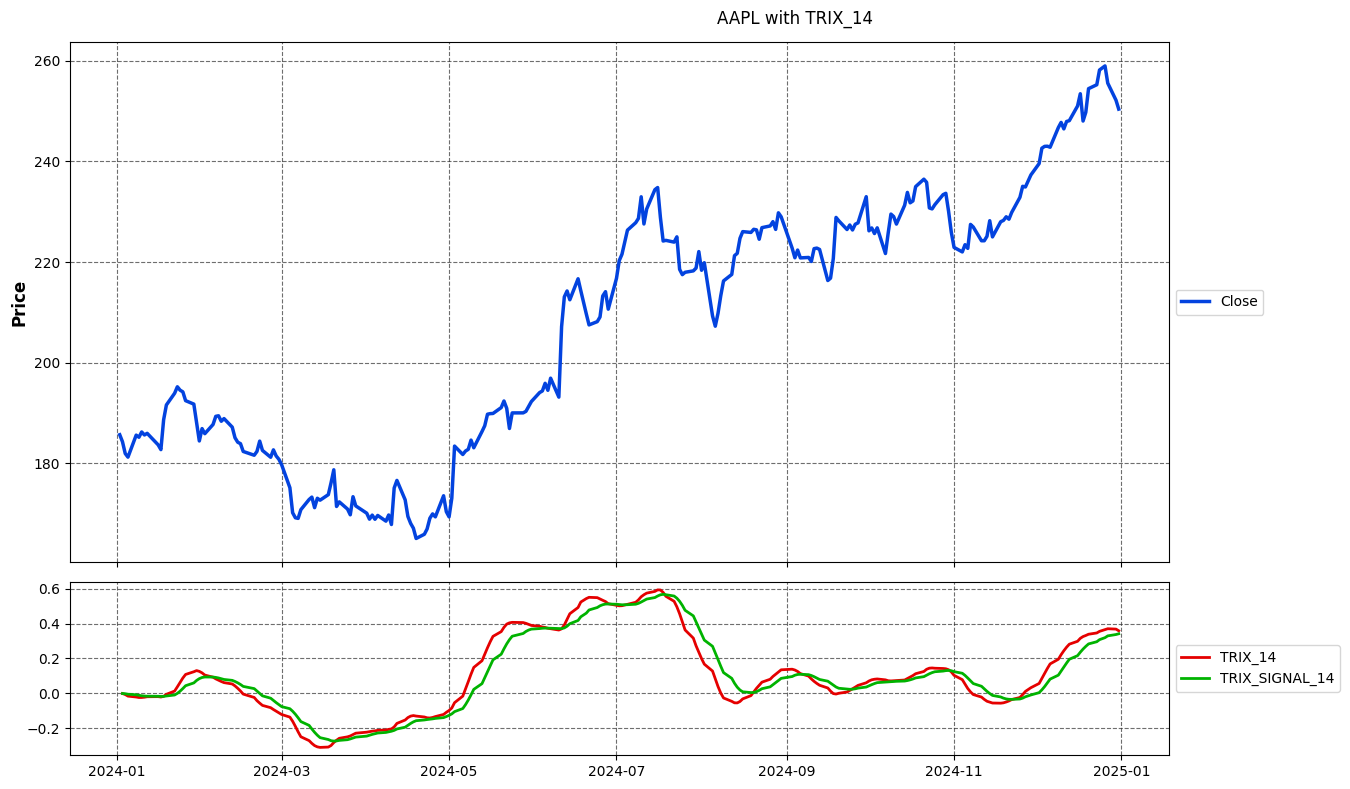

In [13]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 14
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='trix',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'TRIX_{window}', f'TRIX_SIGNAL_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with TRIX_{window}"
    )

### The Weighted Moving Average Index (WMA)


Computing WMA...


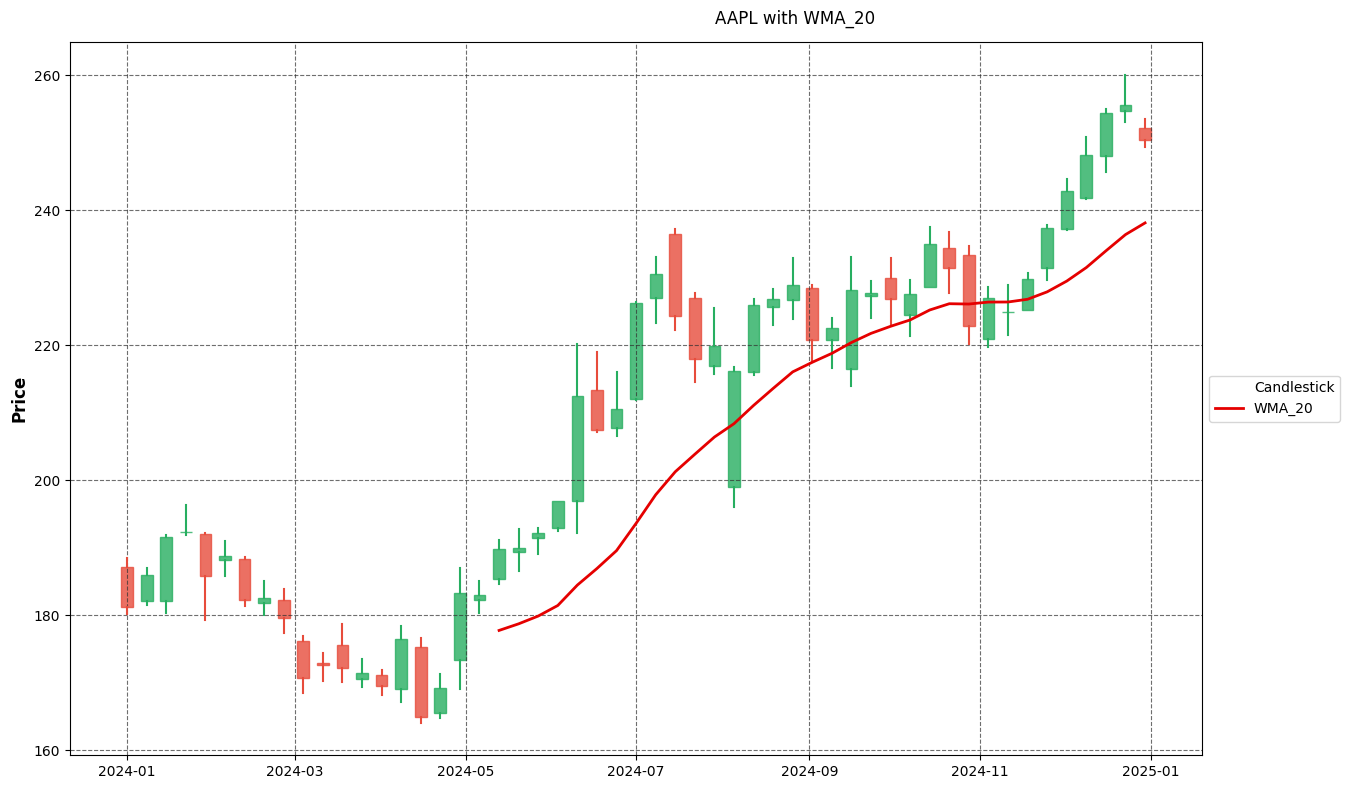

In [14]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window"] = 20
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='wma',
    parameters=parameters,
    columns=columns
)

# Step 3: Plot the indicator
window = parameters["window"]
columns = [f'WMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        plot_type='candlestick',
        title=f"{symbol} with WMA_{window}"
    )